before highway
finished read, start plot
End


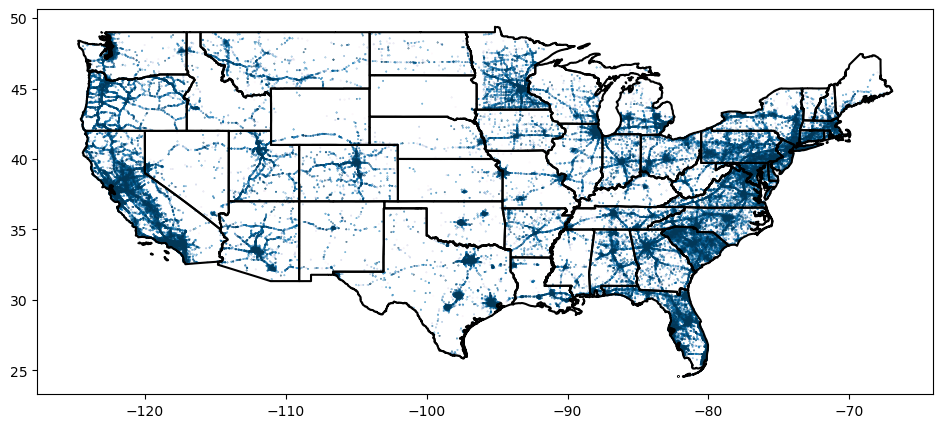

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
df = pd.concat(
    map(pd.read_csv, ['data\output_0.csv', 'data\output_1.csv', 'data\output_2.csv', 'data\output_3.csv', 'data\output_4.csv', 'data\output_5.csv', 'data\output_6.csv', 'data\output_7.csv'])
)

country = gpd.read_file("data\gz_2010_us_040_00_5m.json")
'''
df2= pd.read_csv("states.csv")

y = sorted(df["State"].unique())
x = sorted(df2["Abbreviation"].unique())
print()
print("We got a csv with state abbrieviations to compare to our dataset after some confusion from 'https://github.com/jasonong/List-of-US-States/blob/master/states.csv'")
print("Our database lacks a few sates: database:"+str(len(y))+" < all states+dc:"+str(len(x)))
print("States we dont have data for: " + str([i for i in x if not i in y]))
print("___________________")
print("Both databases have DC, but our dataset claims to have 49 states while lacking Alaska and Hawaii which means it actually has 48, meaning the page was wrong.")
print("So we decided to delete DC, as its not a state.")
'''

country = country[(country['NAME'] != 'District of Columbia') & (country['NAME'] != 'Puerto Rico') & (country['NAME'] != 'Alaska') & (country['NAME'] != 'Hawaii')]

fig, ax = plt.subplots(1, figsize=(12,5))

country.boundary.plot(ax=ax,color="black")

gdf2 = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Start_Lng,df.Start_Lat), crs="EPSG:4326"
)
gdf2.plot(aspect=1,ax=ax,markersize=0.1,cmap='PuBu') #column="POP2010"
'''
cmap vals: 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 
'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG',
'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu',
'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu',
'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr',
'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r',
'gist_gray', 'gist_gray_r', 'gist_grey', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg',
'gist_yarg_r', 'gist_yerg', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'grey', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r',
'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 
'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 
'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'
'''
#passing missing_kwds one can specify the style and label of features containing None or NaN.
'''
missing_kwds={
        "color": "lightgrey",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing values",
    },
'''
def highways(ax):
    gdf = pd.concat(
    map(gpd.read_file, ['data\\National_Highway_System_(NHS)_1.csv', 'data\\National_Highway_System_(NHS)_2.csv', 'data\\National_Highway_System_(NHS)_3.csv', 'data\\National_Highway_System_(NHS)_4.csv'])
    )
    print("finished read, start plot")
    gdf.plot(ax=ax)
    return gdf
#highway vs city stuff, where we compare which one is more likely to get in accident
#https://stackoverflow.com/questions/69082127/plot-heatmap-kdeplot-with-geopandas
#https://altair-viz.github.io/gallery/radial_chart.html
#bts.gov
print("before highway")
gdfhighway = highways(ax)
plt.savefig('america.jpg', dpi=600)
print("End")

In [2]:
gdfhighway

NameError: name 'gdfhighway' is not defined